In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!ls

 anaconda3	       notes			 test_resume.fls
 bserach.py	       Pictures			 test_resume.log
 clip_interrogator     Public			 test_resume.out
 Desktop	       python_learning		 test_resume.pdf
 Documents	       readme.txt		 test_resume.tex
 Downloads	       slarge.py		'Untitled Folder'
 install.sh	       temp_dot_env		 Videos
 javasharedresources   Templates		 Warpinator
 ml		       test.py			 xdm-setup-7.2.11.tar.xz
 Music		       test_resume.aux		 yt_downloaded
 neolen_demo_smp       test_resume.fdb_latexmk	 yt_download.py


In [3]:
data, meta = arff.loadarff('Pumpkin_Seeds_Dataset.arff')

FileNotFoundError: [Errno 2] No such file or directory: 'Pumpkin_Seeds_Dataset.arff'

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(12), object(1)
memory usage: 254.0+ KB


In [ ]:
columns = df.columns.tolist()

In [ ]:
columns.pop()

'Class'

In [ ]:
columns

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Convex_Area',
 'Equiv_Diameter',
 'Eccentricity',
 'Solidity',
 'Extent',
 'Roundness',
 'Aspect_Ration',
 'Compactness']

In [ ]:
s_scale = StandardScaler()
df[columns] = s_scale.fit_transform(df[columns])
df[columns]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814


In [ ]:
le_encoder = LabelEncoder()
df['Class'] = le_encoder.fit_transform(df['Class'])
df['Class']

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64

In [ ]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280,0
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230,0
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483,0
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447,0
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344,1
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340,1
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465,1
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814,1


In [ ]:
X = df.drop(columns="Class")
y = df['Class'].copy()

In [ ]:
X,y

(          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
 0    -1.784703  -2.215755          -2.320224          -0.238536    -1.793218   
 1    -0.294780  -0.568804          -0.700916           0.362089    -0.307244   
 2    -0.661350  -0.432940          -0.369395          -0.633215    -0.642749   
 3    -1.039412  -1.265424          -1.334616          -0.140076    -1.045689   
 4    -1.065105  -1.209626          -1.293272          -0.229276    -1.045762   
 ...        ...        ...                ...                ...          ...   
 2495 -0.074750   0.864479           1.361498          -1.518003    -0.081902   
 2496 -0.805987  -0.420755           0.112758          -1.458572    -0.820566   
 2497  0.536956   0.732689           0.900287          -0.154887     0.522763   
 2498 -0.047375   0.482155           0.805782          -0.903370    -0.044043   
 2499  0.312974   0.271471           0.111931           0.376291     0.310501   
 
       Equiv_Diameter  Ecc

In [ ]:
logistic_reg = LogisticRegression()
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
svm = SVC(kernel='linear', C=1.0, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = XGBClassifier(booster='gbtree', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifiers = [
    ("Logistic Regression", logistic_reg),
    ("SVM", svm),
    ("Random Forest", random_forest),
    ("XGBoost", xgboost),
    ("KNN", knn)
]

Classifier: Logistic Regression
Cross-validation Accuracy Scores: [0.876 0.84  0.892 0.904 0.86  0.912 0.9   0.88  0.856 0.892]
Mean Cross-validation Accuracy: 0.8812


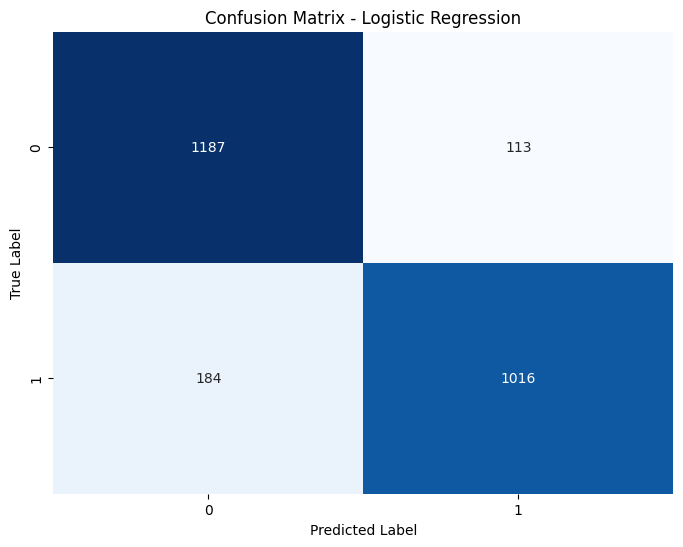

------------------------------
Classifier: SVM
Cross-validation Accuracy Scores: [0.876 0.844 0.892 0.892 0.848 0.904 0.9   0.884 0.868 0.892]
Mean Cross-validation Accuracy: 0.8800000000000001


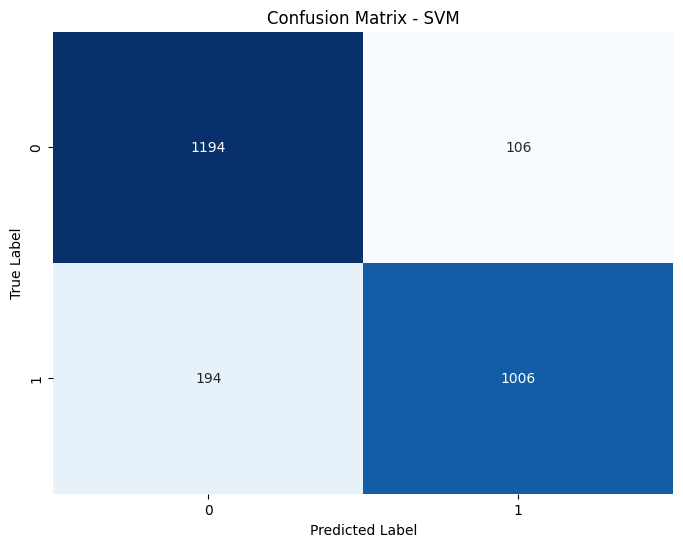

------------------------------
Classifier: Random Forest
Cross-validation Accuracy Scores: [0.868 0.876 0.9   0.912 0.86  0.916 0.884 0.9   0.88  0.908]
Mean Cross-validation Accuracy: 0.8904


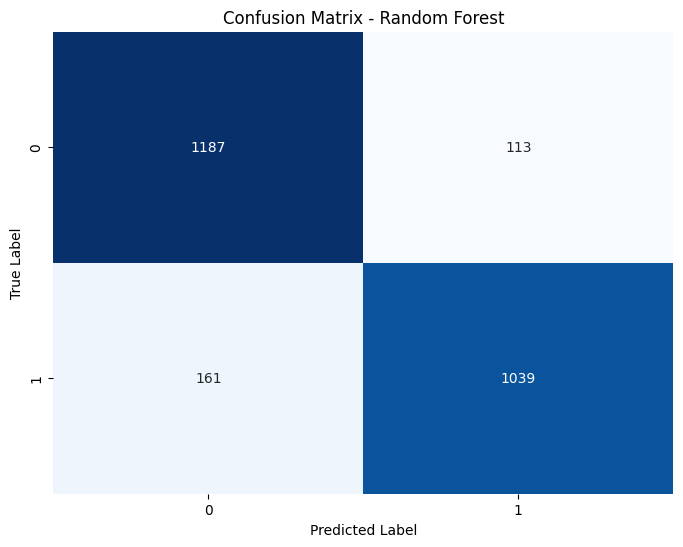

------------------------------
Classifier: XGBoost
Cross-validation Accuracy Scores: [0.876 0.86  0.884 0.884 0.872 0.912 0.892 0.876 0.852 0.896]
Mean Cross-validation Accuracy: 0.8804000000000001


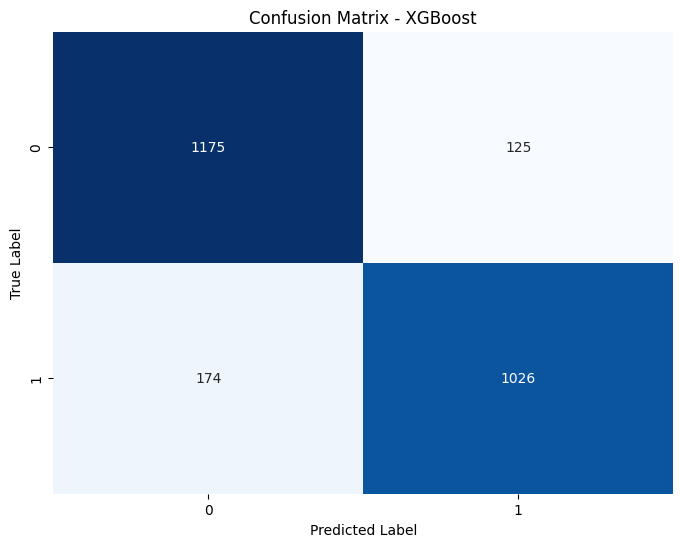

------------------------------
Classifier: KNN
Cross-validation Accuracy Scores: [0.86  0.852 0.884 0.884 0.88  0.912 0.876 0.88  0.876 0.872]
Mean Cross-validation Accuracy: 0.8776000000000002


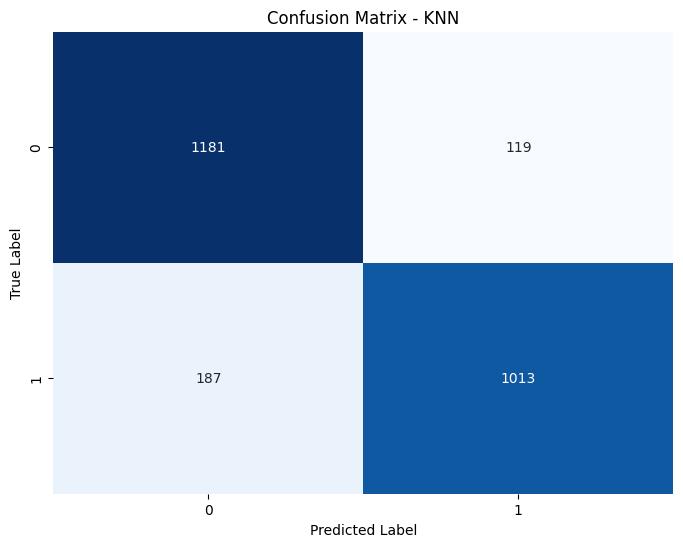

------------------------------


In [ ]:
k_folds  = 10
for name, classifier in classifiers:
    print("Classifier:", name)

    # Cross-validation
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(classifier, X, y, cv=kf)
    print("Cross-validation Accuracy Scores:", cv_scores)
    print("Mean Cross-validation Accuracy:", cv_scores.mean())

    predicted_labels = cross_val_predict(classifier, X, y, cv=kf)
    cm = confusion_matrix(y, predicted_labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("------------------------------")